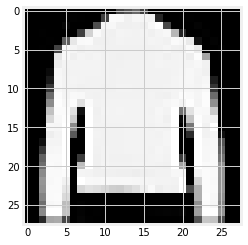

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)


# Train the network

In [5]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
epochs = 10
print_every = 40
steps = 0

for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps +=1
        
        # flatten the fachion-MNIST images into vect 1-D 784
        images.resize_(images.shape[0], 28*28)
        
        # empty gradient
        optimizer.zero_grad()
        
        # forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f"Epoch: {epoch+1} / {epochs}...",
                 f"Loss: {running_loss/print_every: .4f}")
            
            running_loss = 0

Epoch: 1 / 10... Loss:  2.2456
Epoch: 1 / 10... Loss:  2.1075
Epoch: 1 / 10... Loss:  1.8951
Epoch: 1 / 10... Loss:  1.6146
Epoch: 1 / 10... Loss:  1.3763
Epoch: 1 / 10... Loss:  1.1662
Epoch: 1 / 10... Loss:  1.0453
Epoch: 1 / 10... Loss:  0.9526
Epoch: 1 / 10... Loss:  0.9080
Epoch: 1 / 10... Loss:  0.8478
Epoch: 1 / 10... Loss:  0.8070
Epoch: 2 / 10... Loss:  0.2024
Epoch: 2 / 10... Loss:  0.7520
Epoch: 2 / 10... Loss:  0.7191
Epoch: 2 / 10... Loss:  0.7122
Epoch: 2 / 10... Loss:  0.6849
Epoch: 2 / 10... Loss:  0.6938
Epoch: 2 / 10... Loss:  0.6550
Epoch: 2 / 10... Loss:  0.6524
Epoch: 2 / 10... Loss:  0.6291
Epoch: 2 / 10... Loss:  0.6236
Epoch: 2 / 10... Loss:  0.6386
Epoch: 2 / 10... Loss:  0.6171
Epoch: 3 / 10... Loss:  0.3392
Epoch: 3 / 10... Loss:  0.6211
Epoch: 3 / 10... Loss:  0.5974
Epoch: 3 / 10... Loss:  0.5862
Epoch: 3 / 10... Loss:  0.5913
Epoch: 3 / 10... Loss:  0.5661
Epoch: 3 / 10... Loss:  0.5633
Epoch: 3 / 10... Loss:  0.5538
Epoch: 3 / 10... Loss:  0.5652
Epoch: 3

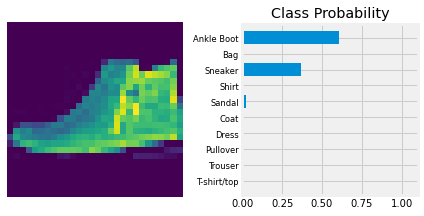

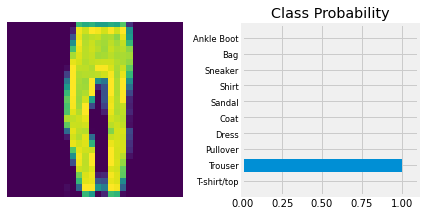

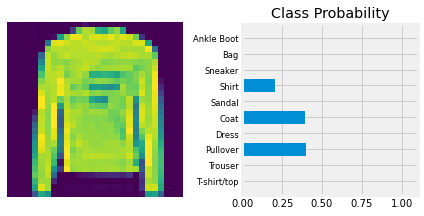

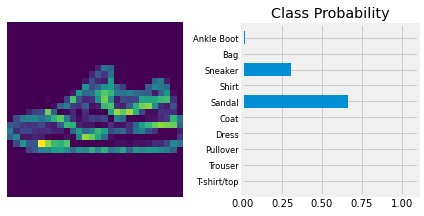

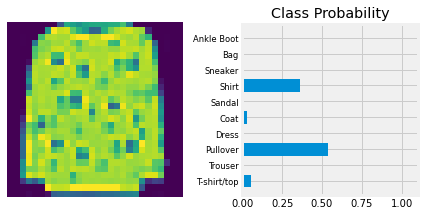

In [9]:
images, labels = next(iter(trainloader))

for i in range(5):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logits = model.forward(img)

    # Output of the network are logits, need to take softmax for probabilities
    ps = F.softmax(logits, dim=1)
    helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')